In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import pyrepseq.plotting as pp

plt.style.use('bmh')

In [2]:
cpu = pd.read_csv('../data/cpu_benchmark.csv', index_col=0)
cpu = cpu[cpu['input_size']>100]
cpu.head()

,runtime,algorithm,input_size,distance
5,0.090237,kdtree,1000,1
7,0.379608,combinatorial_lookup,1000,1
8,0.302681,exhaustive_search,1000,1
9,0.121302,bktree,1000,1
10,0.514983,kdtree,3000,1


In [3]:
cpu.groupby(by=["algorithm","input_size","distance"]).agg(['mean','size'])

runtime     
                                                 mean size
algorithm            input_size distance                  
bktree               1000       1            0.108332   30
                                2            0.337990   30
                     3000       1            0.634675   30
                                2            2.635500   30
                     10000      1            5.097075   30
                                2           26.496897   30
                     30000      1           34.230725   30
                                2          224.285438   30
                     100000     1          281.286976   30
combinatorial_lookup 1000       1            0.378594   30
                                2          270.871417   30
                     3000       1            1.122188   30
                                2          811.196244   30
                     10000      1            3.981821   30
                                2         2125.273909   30
                     30000      1           12.067423   30
                     100000     1           41.939028   30
exhaustive_search    1000       1            0.304999   30
                                2            0.320197   30
                     3000       1            2.862722   30
                                2            3.031625   30
                     10000      1           37.116623   30
                                2           39.051994   30
                     30000      1          399.360579   30
                                2          416.994059   30
kdtree               1000       1            0.129982   30
                                2            0.176530   30
                     3000       1            0.559237   30
                                2            1.353894   30
                     10000      1            4.166836   30
                                2           15.335911   30
                     30000      1           32.790014   30
                                2          158.368008   30
                     100000     1          322.851193   30
symspell             1000       1            0.021968   30
                                2            0.272080   30
                     3000       1            0.100566   30
                                2            1.152178   30
                     10000      1            0.842900   30
                                2            5.024259   30
                     30000      1            4.101298   30
                                2           16.943437   30
                     100000     1           10.829671   30
                                2           39.652377   30

In [4]:
gpu = pd.read_csv('../data/gpu_benchmark.csv', index_col=0)
gpu = gpu[gpu['input_size']>10000]
gpu.head()

,runtime,algorithm,input_size,distance
4,0.304820,V2,30000,1
5,0.203988,V1,30000,1
6,0.404817,V2,100000,1
7,0.205797,V1,100000,1
8,0.706474,V2,300000,1


In [5]:
gpu.groupby(by=["algorithm","input_size","distance"]).agg(['mean','size'])

runtime     
                                     mean size
algorithm input_size distance                 
V1        30000      1           0.204985   30
                     2           0.204872   30
          100000     1           0.205257   30
                     2           0.305382   30
          300000     1           0.305648   30
                     2           0.505861   30
          1000000    1           0.506472   30
                     2           1.512755   30
          3000000    1           1.208836   30
          10000000   1           3.831542   30
V2        30000      1           0.304828   30
                     2           0.505481   30
          100000     1           0.405461   30
                     2           0.997235   30
          300000     1           0.616047   30
                     2           2.348364   30
          1000000    1           1.526008   30
                     2           7.526529   30
          3000000    1           3.911510   30
                     2          26.323332   30
          10000000   1          12.799499   30
                     2         180.135295   30
          30000000   1          44.010189   30
symspell  30000      1           0.880495   30
                     2           6.700363   30
          100000     1           3.244935   30
                     2          25.966979   30
          300000     1          10.574401   30
                     2         102.830496   30
          1000000    1          39.673699   30
                     2         353.391849   30
          3000000    1         130.312604   30
          10000000   1         520.286756   30

In [6]:
cpu_dist = pd.read_csv('../data/cpu_dist_benchmark.csv', index_col=0)
cpu_dist.head()

,runtime,algorithm,input_size,distance
0,6.329441,kdtree,10000,1
2,45.932961,exhaustive_search,10000,1
3,5.462839,bktree,10000,1
4,18.854132,kdtree,10000,2
6,48.758648,exhaustive_search,10000,2


In [7]:
cpu_dist.groupby(by=["algorithm","input_size","distance"]).agg(['mean','size'])

runtime     
                                                 mean size
algorithm            input_size distance                  
bktree               10000      1            6.409209   30
                                2           34.609609   30
                                3           75.489991   30
                                4          114.170484   30
                                5          145.408509   30
combinatorial_lookup 10000      1            4.590236   30
                                2         2125.273909   30
exhaustive_search    10000      1           48.383834   30
                                2           50.489788   30
                                3           53.512983   30
                                4           57.929166   30
                                5           58.800185   30
kdtree               10000      1            4.975600   30
                                2           18.455946   30
                                3           70.731917   30
                                4          100.431386   30
                                5          101.288131   30
symspell             10000      1            0.842900   30
                                2            5.024259   30
                                3           21.552937   30
                                4           59.555192   30
                                5          154.178231   30

In [8]:
gpu_dist = pd.read_csv('../data/gpu_dist_benchmark.csv', index_col=0)
gpu_dist.head()

,runtime,algorithm,input_size,distance
0,0.906859,V1,100000,3
1,3.518090,V2,100000,3
2,0.807416,V1,100000,3
3,3.518116,V2,100000,3
4,0.805802,V1,100000,3


In [9]:
gpu_dist.groupby(by=["algorithm","input_size","distance"]).agg(['mean','size'])

runtime     
                                     mean size
algorithm input_size distance                 
V1        100000     1           0.205257   30
                     2           0.305382   30
                     3           0.813443   30
                     4           3.381393   30
V2        100000     1           0.405461   30
                     2           0.997235   30
                     3           3.524036   30
                     4          14.652550   30
                     5          93.303212   30
symspell  100000     1           3.244935   30
                     2          25.966979   30
                     3         148.854008   30
                     4         613.990152   30

In [10]:
algorithm_labels_cpu = {
                    'kdtree' : 'k-d tree bag',
                    'symspell' : 'SymDel lookup',
                    'combinatorial_lookup': 'Combinatorial lookup',
                    'exhaustive_search': 'Exhaustive search',
                    'bktree' : 'BKtree'
                   }
algorithm_labels_gpu = {
                    'symspell' : 'SymDel lookup (CPU)',
                    'V1' : 'XTNeigbor (GPU)',
                    'V2' : 'XTNeighbor-streaming (GPU)'
                   }
algorithms_cpu = ['exhaustive_search', 'bktree', 'combinatorial_lookup', 'kdtree', 'symspell']
algorithms_gpu = ['symspell', 'V1', 'V2']

cpu
gpu


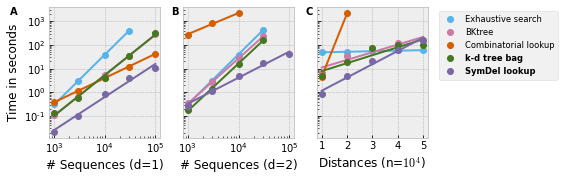

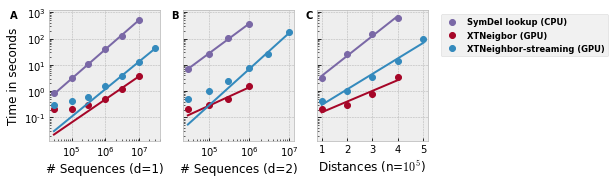

In [11]:
configs =[
    ('cpu', cpu, algorithms_cpu, cpu_dist, algorithm_labels_cpu, 'Distances (n=$10^4$)'),
    ('gpu', gpu, algorithms_gpu, gpu_dist, algorithm_labels_gpu, 'Distances (n=$10^5$)')
]

for name, df, algorithms, df2, labels, x_label in configs:
    print(name)
    fig, axes = plt.subplots(figsize=(6.8, 2.4), ncols=3, sharey=True, sharex=False)
    
    # draw left and middle graphs
    for d in [1, 2]:
        for index, algorithm in enumerate(algorithms):
            data = df[(df['distance']==d) & (df['algorithm']==algorithm)]
            mean = data.groupby('input_size').mean(numeric_only=True)
            x, y = mean.index, mean['runtime']
            if name == 'cpu':
                slope, intercept, r, p, se = scipy.stats.linregress(np.log(x), np.log(y))
                l, = axes[d-1].plot(x, y, 'o',
                        label=labels[algorithm],color=f'C{6-index}')
            elif name == 'gpu':
                slope, intercept, r, p, se = scipy.stats.linregress(np.log(x[-3:]), np.log(y[-3:]))
                l, = axes[d-1].plot(x, y, 'o', label=labels[algorithm], color=f'C{2-index}')
            axes[d-1].plot(x, np.exp(slope*np.log(x)+intercept), '-', color=l.get_color())
            axes[d-1].set_xlabel('# Sequences (d='+str(d)+')')
        axes[d-1].set_yscale('log')
        axes[d-1].set_xscale('log')
        
    # draw right graph                 
    for index, algorithm in enumerate(algorithms):
        data2 = df2[df2['algorithm']==algorithm]
        mean2 = data2.groupby('distance').mean(numeric_only=True)
        x2, y2 = mean2.index, mean2['runtime']
        if name == 'cpu':
            slope2, intercept2, r2, p, se = scipy.stats.linregress(x2, np.log(y2))
            l, = axes[2].plot(x2, y2, 'o', 
                    label=labels[algorithm], color=f'C{6-index}')
            axes[2].plot(x2, np.exp(slope2*x2+intercept2), '-', color=l.get_color())
        elif name == 'gpu':
            slope2, intercept2, r2, p, se = scipy.stats.linregress(x2, np.log(y2))
            l, = axes[2].plot(x2, y2, 'o', 
                    label=labels[algorithm], color=f'C{2-index}')
            axes[2].plot(x2, np.exp(slope2*x2+intercept2), '-', color=l.get_color())
    
    axes[2].set_xlabel(x_label)
    axes[2].set_xticks([1,2,3,4,5])    
    axes[0].set_ylabel('Time in seconds')
    legend = axes[-2].legend(bbox_to_anchor=(3.4 if name=="cpu" else 3.85, 1), fontsize='small')
    for i in range(1, 4 if name=='gpu' else 3):
        legend.get_texts()[-i].set_weight('bold') 
    axes[0].text(-0.35, 1.0, 'A', transform=axes[0].transAxes, fontweight="bold", va="top")
    axes[1].text(-0.1, 1.0, 'B', transform=axes[1].transAxes, fontweight="bold", va="top")
    axes[2].text(-0.1, 1.0, 'C', transform=axes[2].transAxes, fontweight="bold", va="top")
    
    
    fig.savefig(f'{name}_benchmark2.pdf',bbox_inches='tight')
    # fig.savefig(f'{name}_benchmark.svg')